# Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Pre Processing Features

### Company level data

In [3]:
comp_df = pd.read_csv('fundamentals_annual/shifted_data.csv', index_col='Unnamed: 0')
print(comp_df.columns)
comp_df.datadate = pd.to_datetime(comp_df.datadate).dt.year

comp_data = comp_df.drop(['fyear','fyr'], axis= 1)
comp_data.set_index('datadate', inplace= True)
comp_data

Index(['gvkey', 'datadate', 'fyear', 'fyr', 'acominc', 'act', 'ap', 'at', 'ch',
       'citotal', 'cshpri', 'dltt', 'dvt', 'ebit', 'ebitda', 'gp', 'icapt',
       'invt', 'lt', 'opeps', 'revt', 'seq', 'txdi', 'txp', 'txt', 'sic', 'ni',
       'pi', 'txpd'],
      dtype='object')


,gvkey,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
datadate,,,,,,,,,,,,,,,,,,,,,
2000,2080,1.0,136.0,20.0,346.0,3.0,3.0,11.0,45.0,9.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
2001,2080,3.0,98.0,15.0,301.0,5.0,3.0,11.0,7.0,9.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2002,2080,1.0,102.0,17.0,290.0,1.0,3.0,11.0,3.0,9.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
2003,2080,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
2004,2080,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,271841,0.0,1090.0,105.0,1707.0,20.0,18.0,183.0,275.0,4.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2016,271841,0.0,1045.0,87.0,1601.0,9.0,-358.0,181.0,200.0,0.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2017,271841,0.0,523.0,77.0,868.0,8.0,-257.0,13.0,161.0,0.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0


_ni_ is the net income of the following year. i.e.: It is the dependent variable _(Y)_ that has to be predicted.

Our assumption is: the future _ni_, depends on, amongst other factors, the _ni(s)_ of the precious year.

Thus, we shall add some time shifted ni's.

In [5]:
comp_data['prev_ni'] = comp_data.groupby('gvkey')['ni'].shift(1)
comp_data['prev2_ni'] = comp_data.groupby('gvkey')['prev_ni'].shift(1)
comp_data['prev3_ni'] = comp_data.groupby('gvkey')['prev2_ni'].shift(1)
comp_data.dropna(subset=['prev_ni','prev2_ni','prev3_ni'], inplace= True)
comp_data = comp_data.drop(['gvkey'], axis = 1)
comp_data

,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,txdi,txp,txt,sic,ni,pi,txpd,prev_ni,prev2_ni,prev3_ni
datadate,,,,,,,,,,,,,,,,,,,,,
2003,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,1.0,...,-2.0,1.0,0.0,2511,8.0,4.0,-4.0,-1.0,6.0,-3.0
2004,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,3.0,...,1.0,0.0,2.0,2511,7.0,10.0,1.0,8.0,-1.0,6.0
2005,2.0,103.0,19.0,308.0,7.0,7.0,11.0,19.0,9.0,6.0,...,-2.0,0.0,1.0,2511,5.0,9.0,1.0,7.0,8.0,-1.0
2006,3.0,105.0,16.0,309.0,6.0,6.0,11.0,23.0,9.0,-2.0,...,-2.0,0.0,1.0,2511,-10.0,6.0,3.0,5.0,7.0,8.0
2007,1.0,111.0,26.0,310.0,3.0,-11.0,11.0,28.0,9.0,-14.0,...,-3.0,0.0,-5.0,2511,-41.0,-14.0,1.0,-10.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.0,1090.0,105.0,1707.0,20.0,18.0,183.0,275.0,4.0,29.0,...,-5.0,25.0,1.0,1520,-358.0,19.0,1.0,18.0,-17.0,367.0
2016,0.0,1045.0,87.0,1601.0,9.0,-358.0,181.0,200.0,0.0,-130.0,...,27.0,15.0,30.0,1520,-257.0,-155.0,3.0,-358.0,18.0,-17.0
2017,0.0,523.0,77.0,868.0,8.0,-257.0,13.0,161.0,0.0,-160.0,...,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0,-257.0,-358.0,18.0


### Treasury/Inflation Data

,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
caldt,,,,,,,,,,
2001,0.033705,0.040867,0.040302,0.076023,0.082663,0.086428,0.074351,0.044809,0.037786,0.015517
2002,0.163857,0.172186,0.146641,0.149588,0.131414,0.067811,0.034147,0.017951,0.016339,0.023769
2003,0.006738,0.024512,0.012763,0.026151,0.028316,0.019835,0.014680,0.011604,0.010182,0.018794
2004,0.087015,0.082811,0.051849,0.040793,0.023355,0.007544,0.006780,0.013080,0.012005,0.032557
2005,0.089353,0.076566,0.031030,0.017948,0.006416,0.015241,0.022705,0.030790,0.029633,0.034156


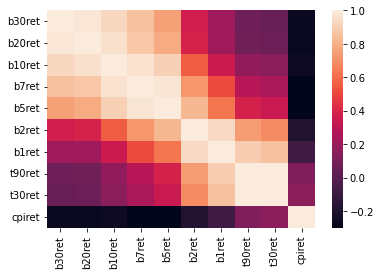

In [6]:
treasury_data = pd.read_csv('treasury_inflation/treasury_inflation.csv')
treasury_data.caldt = pd.to_datetime(treasury_data.caldt).dt.year
treasury_data.set_index('caldt', inplace = True)
sns.heatmap(treasury_data.corr())
treasury_data.head()

The returns on the bills are highly correlated.

Thus, taking all of them is redundant.

We will take one from each:
- short term _(t90ret)_
- long term _(b5ret)_

We also take the _cpiret_ (Inflation rate)

,t90ret,b5ret,cpiret
caldt,,,
2001,0.044809,0.082663,0.015517
2002,0.017951,0.131414,0.023769
2003,0.011604,0.028316,0.018794
2004,0.013080,0.023355,0.032557
2005,0.030790,0.006416,0.034156


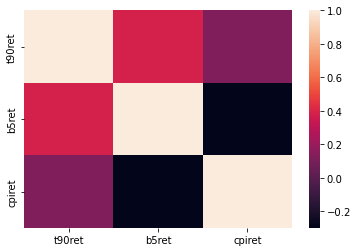

In [9]:
sns.heatmap(treasury_data[['t90ret','b5ret','cpiret']].corr())
treasury_data = treasury_data[['t90ret','b5ret','cpiret']]
treasury_data.head()

## Market Data

In [11]:
index_df = pd.read_csv('index_prices/index_prices.csv')
index_df.datadate = pd.to_datetime(index_df.datadate)
index_df.set_index('datadate', inplace= True)
index_df.head()

,gvkeyx,bkvlps,cshtrm,dvpsxm,dvrate,epsx12,prccm,prchm,prclm,conm,indextype,tic,spii,spmi,indexcat
datadate,,,,,,,,,,,,,,,
1990-01-31,3,NaN,NaN,0.92,11.40,22.869,329.0798,360.5898,319.8298,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-02-28,3,NaN,NaN,0.92,11.40,22.869,331.8899,336.0898,322.0999,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-03-31,3,NaN,NaN,0.92,11.04,21.670,339.9400,343.5300,332.7400,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-04-30,3,NaN,NaN,1.07,11.04,21.670,330.7998,347.2998,327.7598,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-05-31,3,NaN,NaN,1.07,11.04,21.670,361.2300,362.2598,330.7998,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P


In [12]:
# Only interested in the close price
index_data = index_df[['tic','prccm']]
index_data

,tic,prccm
datadate,,
1990-01-31,I0003,329.0798
1990-02-28,I0003,331.8899
1990-03-31,I0003,339.9400
1990-04-30,I0003,330.7998
1990-05-31,I0003,361.2300
...,...,...
2021-09-30,AHD.I,506.6692
2021-10-31,AHD.I,519.2445
2021-11-30,AHD.I,529.0903


In [27]:
from scipy.stats.mstats import gmean

def annual_returns(close_price):
    close_price.fillna(close_price.mean(), inplace = True) # filling Nan's with mean
    return gmean(close_price.pct_change()[1:] + 1) -1 # geometric mean of returns...for annualising

In [28]:
index_data.groupby(['tic'])['prccm'].resample('A').agg(annual_returns).unstack().T

tic,AHD.I,CI0775,CI1040,CI1311,I0003
datadate,,,,,
1990-12-31,NaN,-0.005401,-0.027032,-0.005709,0.000314
1991-12-31,NaN,0.024472,0.001774,-0.013178,0.017688
1992-12-31,NaN,-0.004126,0.005056,0.003941,0.005815
1993-12-31,NaN,0.008754,0.068482,0.024744,0.005575
1994-12-31,0.000000,-0.009898,-0.010919,-0.010245,-0.004309
1995-12-31,0.014851,0.022064,0.019097,0.017911,0.024803
1996-12-31,0.000125,0.010246,-0.005868,0.028377,0.013953
1997-12-31,0.018264,0.001792,-0.045402,-0.003439,0.019328
1998-12-31,0.002091,0.011623,-0.012651,-0.028258,0.020786


In [29]:
index_df[['tic','conm']].drop_duplicates()

,tic,conm
datadate,,
1990-01-31,I0003,S&P 500 Comp-Ltd
1990-01-31,CI1040,S&P/TSX-Gold/Precious Minrls
1990-01-31,CI1311,S&P/TSX-Oil And Gas
1990-01-31,CI0775,S&P/TSX-Consumer Products
1992-12-31,AHD.I,SP500 Household Durables .I


Since only S&P500 and S&P500 Household Durables have recent data, we consider only these market indicators

In [30]:
index_data = index_data.groupby(['tic'])['prccm'].resample('A').agg(annual_returns).unstack().T
index_data = index_data[['I0003','AHD.I']].dropna()
index_data.index = index_data.index.year
index_data.rename({'I0003':'SNP500', "AHD.I":'SNP500_CD'}, axis=1, inplace= True)
index_data

tic,SNP500,SNP500_CD
datadate,,
1994,-0.004309,0.000000
1995,0.024803,0.014851
1996,0.013953,0.000125
1997,0.019328,0.018264
1998,0.020786,0.002091
1999,0.012640,-0.015632
2000,-0.004957,-0.002144
2001,-0.015676,0.012427
2002,-0.022509,-0.003884


## Merge

In [17]:
treasury_data.join(index_data).to_csv('market_data.csv')
treasury_data.join(index_data)

,t90ret,b5ret,cpiret,SNP500,SNP500_CD
caldt,,,,,
2001,0.044809,0.082663,0.015517,-0.015676,0.012427
2002,0.017951,0.131414,0.023769,-0.022509,-0.003884
2003,0.011604,0.028316,0.018794,0.024097,0.029007
2004,0.013080,0.023355,0.032557,0.006291,0.016300
2005,0.030790,0.006416,0.034156,0.005029,0.007722
2006,0.048354,0.027717,0.025408,0.009365,-0.007227
2007,0.050863,0.101754,0.040814,0.001886,-0.036031
2008,0.020446,0.131459,0.000915,-0.037706,-0.054795
2009,0.002232,-0.024693,0.027213,0.027671,0.044671


In [34]:
data = comp_data.join(treasury_data.join(index_data))
data

,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,pi,txpd,prev_ni,prev2_ni,prev3_ni,t90ret,b5ret,cpiret,SNP500,SNP500_CD
2003,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,1.0,...,4.0,-4.0,-1.0,6.0,-3.0,0.011604,0.028316,0.018794,0.024097,0.029007
2003,0.0,6.0,1.0,6.0,0.0,-1.0,1.0,0.0,0.0,-2.0,...,-2.0,0.0,-1.0,0.0,1.0,0.011604,0.028316,0.018794,0.024097,0.029007
2003,-73.0,1715.0,321.0,3602.0,345.0,143.0,91.0,583.0,45.0,246.0,...,201.0,85.0,135.0,78.0,81.0,0.011604,0.028316,0.018794,0.024097,0.029007
2003,-1.0,32.0,4.0,57.0,0.0,1.0,9.0,30.0,0.0,8.0,...,2.0,-2.0,2.0,27.0,-74.0,0.011604,0.028316,0.018794,0.024097,0.029007
2003,0.0,121.0,19.0,218.0,14.0,-9.0,11.0,76.0,0.0,20.0,...,-3.0,-2.0,-25.0,-4.0,-9.0,0.011604,0.028316,0.018794,0.024097,0.029007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,25.0,...,24.0,4.0,19.0,28.0,28.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,824.0,...,-184.0,116.0,-76.0,600.0,553.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,889.0,...,897.0,305.0,645.0,483.0,258.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,0.0,218.0,20.0,535.0,49.0,16.0,33.0,113.0,0.0,30.0,...,20.0,6.0,16.0,20.0,7.0,0.006920,0.073770,0.013621,0.013940,0.010226


The top 10 most correlated features with "ni" are:


pi          0.707507
citotal     0.695166
ebit        0.682927
prev_ni     0.672711
dvt         0.586135
txpd        0.566000
ebitda      0.559611
prev2_ni    0.532728
prev3_ni    0.513553
txt         0.449260
Name: ni, dtype: float64

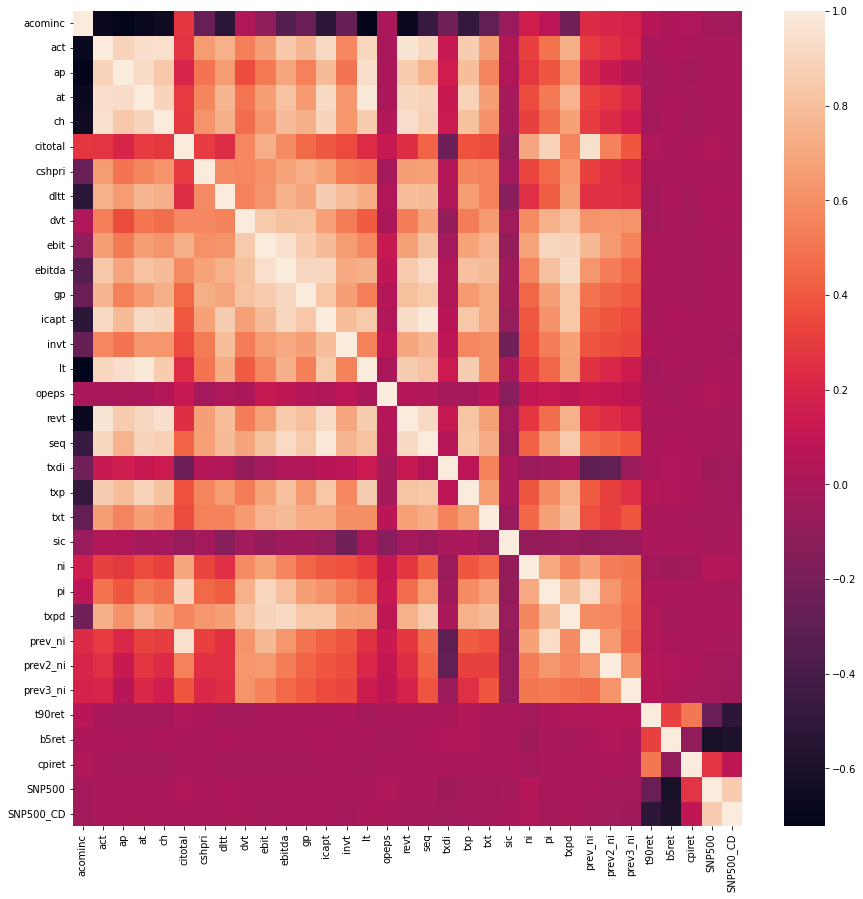

In [42]:
plt.gcf().set_size_inches(15, 15,  forward=True)
sns.heatmap(data.corr())
print('The top 10 most correlated features with "ni" are:')
abs(data.corr()['ni']).sort_values(ascending = False)[1:11]

Clearly most if the features are highly correlated with each other.

Running an OLS over all of them is not a wise decision.

Let us run an OLS over just the past _ni(s)_

In [66]:
import statsmodels.api as sm
from patsy import dmatrices

from sklearn.model_selection import train_test_split
from typing import Union

from sklearn.metrics import r2_score

class OLS:
    def __init__(self, formula: str, data: pd.DataFrame):
        self.y, self.X = dmatrices(formula, data=data, return_type='dataframe')
        return
    
    def train(self, validation_split: Union[None,float] = None):
        self.val_split = validation_split
        if validation_split:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=validation_split, random_state=42)
            self.model = sm.OLS(self.y_train,self.X_train)
        else:
            self.model = sm.OLS(self.y, self.X)
        self.result = self.model.fit()
        return self.result.summary()

    def r2_score(self, precision: int = 4):
        if self.val_split:
            return round(r2_score(self.y_test, self.result.predict(self.X_test)), precision)
        else:
            return round(r2_score(self.y, self.result.predict(self.X)), precision)
        

In [73]:
model_prev_nis = OLS(formula='ni ~ prev_ni+prev2_ni+prev3_ni', data=data)
print(model_prev_nis.train())

                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     679.5
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          4.46e-305
Time:                        01:24:40   Log-Likelihood:                -15667.
No. Observations:                2017   AIC:                         3.134e+04
Df Residuals:                    2013   BIC:                         3.136e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4592     13.057      2.792      0.0

We observe that the prev-ni and prev3_ni are significant in determining the future ni.

Prev2_ni is insignificant

<AxesSubplot:>

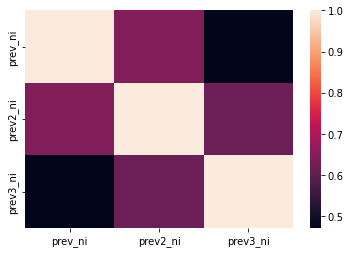

In [54]:
sns.heatmap(data[['prev_ni',"prev2_ni","prev3_ni"]].corr())

This can be explained by the fact that while *prev_ni* and *prev3_ni* have a very low correlation, *prev2_ni* has a high correlation with both.

Thus, it doesn't add any _'new information"_ to the OLS, hence is insignificant

### Step Wise Regression

In [74]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# data = load_boston()
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = data.target


def stepwise_selection(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  pi                             with p-value 4.13679e-306
Add  prev3_ni                       with p-value 7.72223e-29
Add  citotal                        with p-value 3.3452e-31
Add  ebit                           with p-value 2.76966e-21
Add  gp                             with p-value 2.39768e-22
Add  prev_ni                        with p-value 3.5281e-14
Drop pi                             with p-value 0.926996
Add  dltt                           with p-value 1.89934e-08
Add  ap                             with p-value 1.92676e-11
Add  ebitda                         with p-value 3.9198e-26
Drop gp                             with p-value 0.0610428
Add  ch                             with p-value 4.7857e-06
Add  acominc                        with p-value 3.52454e-08
Add  lt                             with p-value 5.3137e-08
Add  at                             with p-value 4.47718e-10
Add  seq                            with p-value 8.14257e-15
Add  txp                         

In [80]:
model_step = OLS(formula=f'ni ~ {"+".join(result)}', data=data)
print(model_step.train(validation_split= 0.2))
print(f'Test Set R2 is:{model_step.r2_score()}')

                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     188.5
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:28:56   Log-Likelihood:                -12188.
No. Observations:                1613   AIC:                         2.441e+04
Df Residuals:                    1596   BIC:                         2.450e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.0224     16.664      1.982      0.0